Highest Galaxy: Galaxy 1
Coords: (9.16085726217318,8.807258629151487)


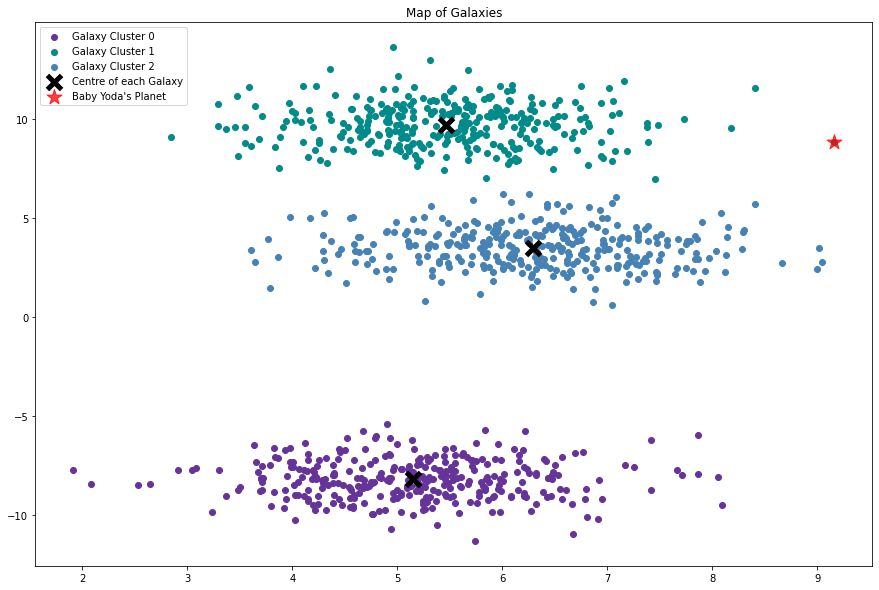

In [4]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import seaborn

# Make our graphs big
fig = plt.figure(figsize=(15, 10))

# Load the galaxy data into a dataframe
df = pd.read_csv("galaxies.csv")
# When working with lots of data, it's often a good idea to plot it, let's see what we're working with!
#plt.scatter(df.X,df.Y)



def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    for i in range(len(labels)):
        if labels[i] == 0:
            data_0.append(points[i])
        if labels[i] == 1:
            data_1.append(points[i])
        if labels[i] == 2:
            data_2.append(points[i])
            
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    
    return data_0,data_1,data_2


# data_0,data_1,data_2 =separate_labels(labels, coords)
# plt.scatter(data_0[:,0], data_0[:,1], color="rebeccapurple", label="Galaxy Cluster 0")
# plt.scatter(data_1[:,0], data_1[:,1], color="darkcyan", label="Galaxy Cluster 1")
# plt.scatter(data_2[:,0], data_2[:,1], color="steelblue", label="Galaxy Cluster 2")

def create_galaxy_map(labels, coords):
    data_0,data_1,data_2 =separate_labels(labels, coords)
    plt.scatter(data_0[:,0], data_0[:,1], color="rebeccapurple", label="Galaxy Cluster 0")
    plt.scatter(data_1[:,0], data_1[:,1], color="darkcyan", label="Galaxy Cluster 1")
    plt.scatter(data_2[:,0], data_2[:,1], color="steelblue", label="Galaxy Cluster 2")




# centroids = model.cluster_centers_
# centroids_x = centroids[:,0]
# centroids_y = centroids[:,1]
# plt.scatter(centroids_x, centroids_y, marker="x", s=200, color="black", linewidths=5,label="Centre of each Galaxy")

def plot_centres(model):
    centroids = model.cluster_centers_
    centroids_x = centroids[:,0]
    centroids_y = centroids[:,1]
    plt.scatter(centroids_x, centroids_y, marker="x", s=200, color="black", linewidths=5,label="Centre of each Galaxy")
    return

# Compare them and keep track of which was highest, that's the galaxy we care about
def find_uppermost_galaxy(data_0,data_1,data_2):
    name = ""
    if (data_1[:,1].mean()) > (data_0[:,1].mean()):
        uppermost_galaxy = data_1
        name = "Galaxy 1"
    else:
        uppermost_galaxy = data_0
        name = "Galaxy 0"

    if (data_2[:,1].mean()) > (uppermost_galaxy[:,1].mean()):
        uppermost_galaxy = data_2
        name = "Galaxy 2"
    
    print("Highest Galaxy: {}".format(name))
    return uppermost_galaxy

# Find the values of the planet with highest X value of that galaxy
def find_rightmost_coords(galaxy):
    rightmost_point = max(galaxy[:,0])
    coords = []
    for planet in galaxy:
        if planet[0] == rightmost_point:
            print("Coords: ({},{})".format(planet[0],planet[1]))
            coords=[planet[0],planet[1]]

    return coords






# Setup

coords = df.values
model = KMeans(n_clusters=3)
model.fit(coords)
labels = model.predict(coords)

points = df.values


data_0 = []
data_1 = []
data_2 = []
for i in range(len(labels)):
    if labels[i] == 0:
        data_0.append(points[i])
    if labels[i] == 1:
        data_1.append(points[i])
    if labels[i] == 2:
        data_2.append(points[i])
        
data_0 = np.array(data_0)
data_1 = np.array(data_1)
data_2 = np.array(data_2)
# Visualisations
create_galaxy_map(labels, coords)
plot_centres(model)
# Final
baby_planet = find_rightmost_coords(find_uppermost_galaxy(data_0, data_1, data_2))

plt.scatter(baby_planet[0], baby_planet[1], marker="*", s=250, alpha=0.75,label="Baby Yoda's Planet", color="red")
plt.title("Map of Galaxies")
plt.legend()
plt.show()
